# **Data Visualisation of Electronic Sales**

## Objectives

* Draw data insights from visualisations and prove hypotheses that will help business growth

## Inputs

* Electronic_sales_cleaned.csv



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [57]:
import os
current_dir = os.getcwd()
current_dir 

'c:\\Hamas\\AI\\AI_Projects\\Code_Institute_Projects\\electronic_sales_project\\Electronic_Sales'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [58]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [59]:
current_dir = os.getcwd()
current_dir

'c:\\Hamas\\AI\\AI_Projects\\Code_Institute_Projects\\electronic_sales_project'

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [61]:
df = pd.read_csv('dataset/cleaned/Electronic_sales_cleaned.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'dataset/cleaned/Electronic_sales_cleaned.csv'

In [ ]:
df

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total,Grand Total
0,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09,767.18
1,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00,1855.84
2,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16,3224.92
3,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56,77.06
4,1004,41,Female,No,Smartphone,SKU1001,5,Completed,Credit Card,83.00,20.75,4,2024-05-26,Standard,"Impulse Item,Accessory",65.78,148.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13427,19995,69,Female,Yes,Laptop,LTP123,3,Completed,Credit Card,5394.56,674.32,8,2024-08-09,Same Day,NaN,0.00,5394.56
13428,19996,27,Female,No,Smartphone,SMP234,5,Completed,Credit Card,3419.04,1139.68,3,2024-04-20,Same Day,NaN,0.00,3419.04
13429,19996,27,Female,No,Smartphone,SMP234,4,Completed,Bank Transfer,6838.08,1139.68,6,2024-06-15,Expedited,NaN,0.00,6838.08
13430,19996,27,Female,No,Headphones,HDP456,4,Completed,Bank Transfer,1805.90,361.18,5,2024-08-26,Standard,"Impulse Item, Extended Warranty, Accessory",198.98,2004.88


### **Hypothesis 1:** Loyalty Members spend more per transaction than non-loyalty members:



For this I will create a bar chart to see if there is a notable difference in spending amount between loyalty members and non-loyalty members

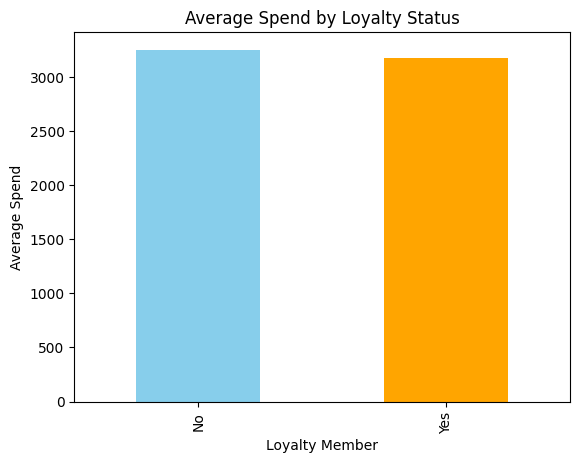

In [ ]:
avg_spend = df.groupby('Loyalty Member')['Grand Total'].mean()
avg_spend.plot(kind='bar', color=['skyblue','orange'])
plt.ylabel('Average Spend')
plt.title('Average Spend by Loyalty Status')
plt.show()

From this visualisation, loyalty members do spend a little more but it is not a big enough difference to conclude that the loyalty scheme impacts the way customers spend in a large way. There is a definite room for improvement for the loyalty scheme.

### **Hypothesis 2:** Certain product categories have higher revenues than others:

I will use a bar chart to see which products generate the highest revenue

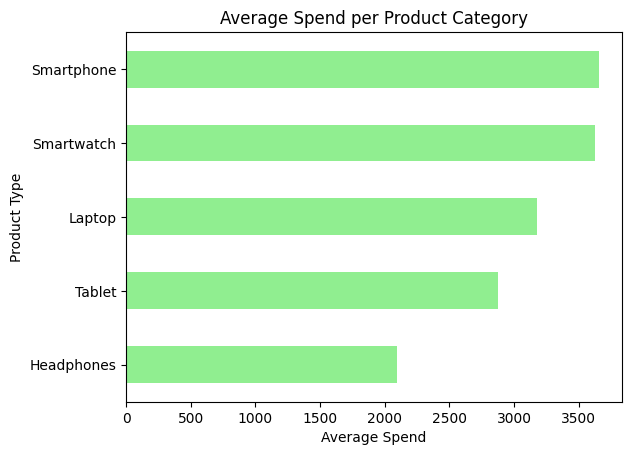

In [ ]:
avg_category = df.groupby('Product Type')['Grand Total'].mean().sort_values()
avg_category.plot(kind='barh', color='lightgreen')
plt.xlabel('Average Spend')
plt.title('Average Spend per Product Category')
plt.show()

From this graph we can see that the most profit is generated from Smartphones and smartwatches so it would be smart for the retail business to have a healthy stock of both. Another thing to note is that headphones are generating the least amount of profit so overstocking on headphones may be a bad idea.

### **Hypothesis 3:** Sales peak in specific months:

I will use a histogram to show monthly total revenue to see if sales peak in a specific month

The data type for the 'Purchase Date' column is not recognised as a datetime type by Pandas so i will convert it into one to allow the histogram visualisation to work

In [ ]:
print(df['Purchase Date'].dtype)

object


In [ ]:
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'], errors='coerce') # Convert to datetime
print(df['Purchase Date'].dtype) # Verify the change

datetime64[ns]


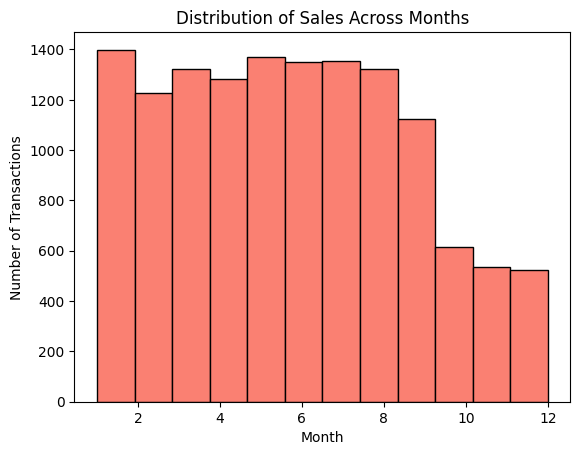

In [ ]:
df['month'] = df['Purchase Date'].dt.month
plt.hist(df['month'], bins=12, color='salmon', edgecolor='black')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.title('Distribution of Sales Across Months')
plt.show()

From this graph we can see that that in months 10-12 there is a huge drop in transactions. One way to resolve this is by add sales related to certain Holidays such as Halloween or Christmas to entice customers to buy more.

### **Hypothesis 4:** Male and Female customers differ in spending distribution:

I will create a boxplot to see the distribution of Male and Female customers in terms of spending

C:\Users\hamas\AppData\Local\Temp\ipykernel_17492\744728839.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='Gender', x='Grand Total', palette='Set1')


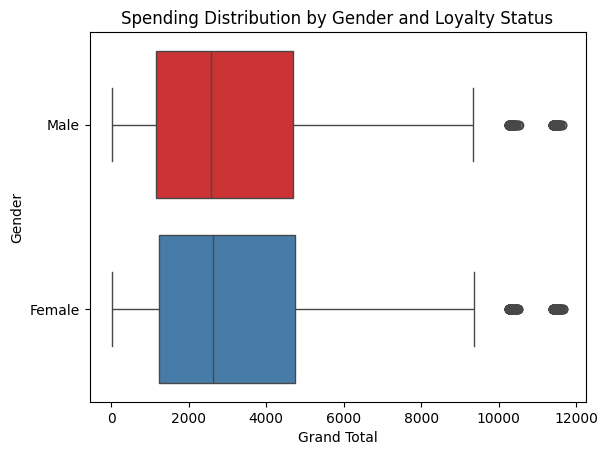

In [ ]:
sns.boxplot(data=df, y='Gender', x='Grand Total', palette='Set1')
plt.title('Spending Distribution by Gender and Loyalty Status')
plt.show()


In this boxplot we can see that there is no difference between Male and Female spending behaviour. The "Outliers" are only considered outliers as the quantity of the items bought was high and does not mean that they are an error.

### **Hypothesis 5:** Add-on purchases are more common for higher-priced products:

For this hypothesis i will use a violin plot of product price by add-on purchase

C:\Users\hamas\AppData\Local\Temp\ipykernel_17492\4227715329.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(xticks_labels)


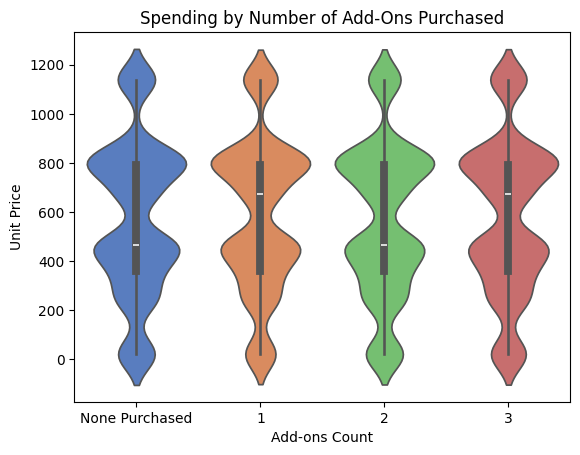

In [ ]:
# Create a new column with the counts instead of names
df['Add-ons Count'] = df['Add-ons Purchased'].apply(lambda x: len(str(x).split(',')) if pd.notnull(x) else 0)

# Violin plot using the count instead of full names
sns.violinplot(data=df, x='Add-ons Count', y='Unit Price', palette='muted', hue='Add-ons Count', legend=False)
plt.title('Spending by Number of Add-Ons Purchased')

# Replace '0' with 'None Purchased' in x-axis labels
xticks_labels = ['None Purchased' if int(tick.get_text()) == 0 else tick.get_text() 
                 for tick in plt.gca().get_xticklabels()]
plt.gca().set_xticklabels(xticks_labels)

plt.show()

From the graph we can see that the price of the item does not effect the amount of add-ons bought so there is no correlation.

### **Hypothesis 6:** Younger customers tend to spend less than older customers. 

I will use a Swarm plot of spending of an age groups to determine if a group spends more than the other

C:\Users\hamas\AppData\Local\Temp\ipykernel_17492\3251916701.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=df, x='Age Group', y='Grand Total', palette='Set2', size=2)
c:\Hamas\AI\AI_Projects\Code_Institute_Projects\electronic_sales_project\Electronic_Sales\.venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 25.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Hamas\AI\AI_Projects\Code_Institute_Projects\electronic_sales_project\Electronic_Sales\.venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 25.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Hamas\AI\AI_Projects\Code_Institute_Projects\electronic_sales_project\Electr

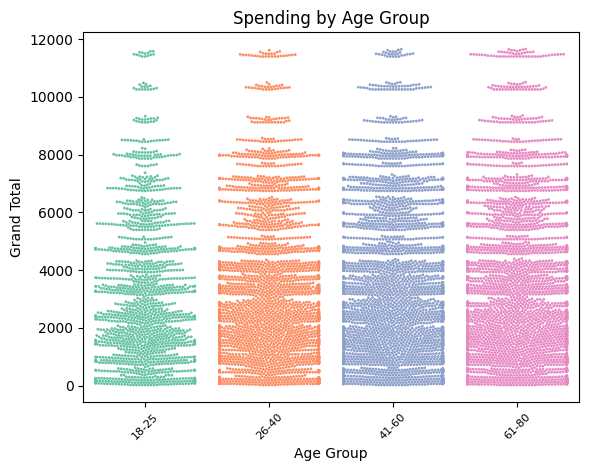

In [ ]:
# Create age groups for the x-axis
bins = [18, 25, 40, 60, 80]
labels = ['18-25', '26-40', '41-60', '61-80']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True, include_lowest=True)
sns.swarmplot(data=df, x='Age Group', y='Grand Total', palette='Set2', size=2, hue='Age Group', legend=False)
plt.title('Spending by Age Group')
plt.xlabel('Age Group')
plt.xticks(rotation=45, fontsize=8)
plt.show()

From the graph we can see that the higher age groups do tend to spend more than lower age groups.

### **Hypothesis 7:** Loyalty members buy more add-ons than non-loyalty members.

For this I will use a Stacked bar chart of add-on purchases by loyalty status

In [ ]:
import plotly.express as px

# Create a new column for add-on count (0 if 'None Purchased', else count of items)
df['Add-ons Count'] = df['Add-ons Purchased'].apply(lambda x: 0 if x == 'None Purchased' or pd.isnull(x) else len(str(x).split(',')))

# Stacked bar chart: Number of add-ons purchased by loyalty status
add_on_count = df.groupby(['Loyalty Member', 'Add-ons Count']).size().reset_index(name='count')
color_map = {0: 'red', 1: 'blue', 2: 'green', 3: 'orange', 4: 'purple', 5: 'brown'}
fig = px.bar(add_on_count, x='Loyalty Member', y='count', color='Add-ons Count', barmode='stack',
             color_discrete_map=color_map, title='Number of Add-Ons Purchased by Loyalty Status')
fig.show()

# Calculate percentage of loyalty and non-loyalty members who bought at least 1 add-on
loyalty_mask = df['Loyalty Member'] == 'Yes'
non_loyalty_mask = df['Loyalty Member'] == 'No'

loyalty_total = loyalty_mask.sum()
non_loyalty_total = non_loyalty_mask.sum()

loyalty_with_addon = ((df['Add-ons Count'] > 0) & loyalty_mask).sum()
non_loyalty_with_addon = ((df['Add-ons Count'] > 0) & non_loyalty_mask).sum()

loyalty_pct = (loyalty_with_addon / loyalty_total * 100) if loyalty_total > 0 else 0
non_loyalty_pct = (non_loyalty_with_addon / non_loyalty_total * 100) if non_loyalty_total > 0 else 0

print(f"Percentage of loyalty members who bought at least 1 add-on: {loyalty_pct:.2f}%")
print(f"Percentage of non-loyalty members who bought at least 1 add-on: {non_loyalty_pct:.2f}%")

Percentage of loyalty members who bought at least 1 add-on: 75.31%
Percentage of non-loyalty members who bought at least 1 add-on: 75.59%


From this graph we can see that a loyalty member is not more likely to buy add-ons than a non-loyalty member.

### **Hypothesis 8:** Certain payment methods are associated with higher average transaction value.

I will use a Bar chart of average spend per payment method to see if there is any correlation

In [ ]:
avg_payment = df.groupby('Payment Method')['Grand Total'].mean().reset_index()
fig = px.bar(avg_payment, x='Payment Method', y='Grand Total', color='Payment Method',
             title='Average Spend by Payment Method')
fig.show()


### **Hypothesis 9:** High-rated products are associated with higher sales.

---